In [30]:
from google.colab import drive
import os
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import subprocess
import sys
import numpy as np
import joblib
from sklearn_crfsuite import CRF

drive.mount('/content/drive')

crf_model_path = '/content/drive/My Drive/crf/crf_model.joblib'

if os.path.exists(crf_model_path):
    print(f"Le modèle CRF est présent à l'emplacement: {crf_model_path}")
else:
    print("Le modèle CRF n'a pas été trouvé à l'emplacement spécifié.")

try:
    crf_model = joblib.load(crf_model_path)
    print("Modèle CRF chargé avec succès.")
except Exception as e:
    print(f"Erreur lors du chargement du modèle CRF: {e}")

def extract_features(tokens):
    features = []
    for i in range(len(tokens)):
        token = tokens[i]
        feature = {
            'word': token,
            'is_capitalized': token[0].isupper(),
            'is_punctuation': token in ",.!?;:",
            'word_len': len(token),
        }
        features.append(feature)
    return features

phrases = [
    "Je pars de Paris et j'arrive à Marseille.",
    "Je vais à Bordeaux en partant de Toulouse.",
    "Mon trajet va de VILLIERS SUR LOIR à JARNY.",
    "Nous partons de Lyon et nous arrivons à Nice.",
    "Le départ est prévu à Lille, et l'arrivée se fera à Strasbourg.",
    "Mon itinéraire inclut un départ de Montpellier et une arrivée à Perpignan.",
    "Le train partira de Nantes pour arriver à Rennes.",
    "Un vol de Genève à Zurich est prévu demain matin.",
    "Je vais de Grenoble à Dijon en voiture.",
    "Je voyage de Bruxelles à Amsterdam ce week-end.",
    "L'itinéraire commence à Marseille et se termine à Toulon.",
    "Nous prenons un train de Rouen pour aller au Havre.",
    "Le départ sera à Limoges et l'arrivée à Poitiers.",
    "Je quitte Monaco pour aller à Menton.",
    "Le bus va de Caen à Cherbourg.",
    "Il part de Bayonne et arrive à Biarritz.",
    "Je vais de Chamonix à Annecy.",
    "Nous roulons de Bastia à Ajaccio.",
    "Le ferry part de Calais pour arriver à Douvres.",
    "Je pars de Bordeaux et j'arrive à Paris.",
    "Notre vol va de Madrid à Barcelone.",
    "Un trajet en voiture de Milan à Rome est prévu.",
    "Je vais à Paris en partant de Lyon."
]

entities = []
entity_types = []

for phrase in phrases:
    print(f"\nPhrase: {phrase}")

    tokens = phrase.split()

    features = extract_features(tokens)

    try:
        predictions = crf_model.predict([features])
        labels = predictions[0]

        # Affichage des entités et de leurs labels
        for token, label in zip(tokens, labels):
            print(f"Token: {token}, Label: {label}")
            entities.append(token)
            entity_types.append(label)
    except Exception as e:
        print(f"Erreur lors du traitement de la phrase '{phrase}': {e}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Le modèle CRF est présent à l'emplacement: /content/drive/My Drive/crf/crf_model.joblib
Modèle CRF chargé avec succès.

Phrase: Je pars de Paris et j'arrive à Marseille.
Token: Je, Label: ARR
Token: pars, Label: ARR
Token: de, Label: ARR
Token: Paris, Label: ARR
Token: et, Label: ARR
Token: j'arrive, Label: ARR
Token: à, Label: ARR
Token: Marseille., Label: ARR

Phrase: Je vais à Bordeaux en partant de Toulouse.
Token: Je, Label: ARR
Token: vais, Label: ARR
Token: à, Label: ARR
Token: Bordeaux, Label: ARR
Token: en, Label: ARR
Token: partant, Label: ARR
Token: de, Label: ARR
Token: Toulouse., Label: ARR

Phrase: Mon trajet va de VILLIERS SUR LOIR à JARNY.
Token: Mon, Label: ARR
Token: trajet, Label: ARR
Token: va, Label: ARR
Token: de, Label: ARR
Token: VILLIERS, Label: ARR
Token: SUR, Label: ARR
Token: LOIR, Label: ARR
Token: à, Label: ARR
Token: JARNY., Lab

<ipython-input-27-b04d9fb6a65c>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(entity_counter.keys()), y=list(entity_counter.values()), palette="viridis")


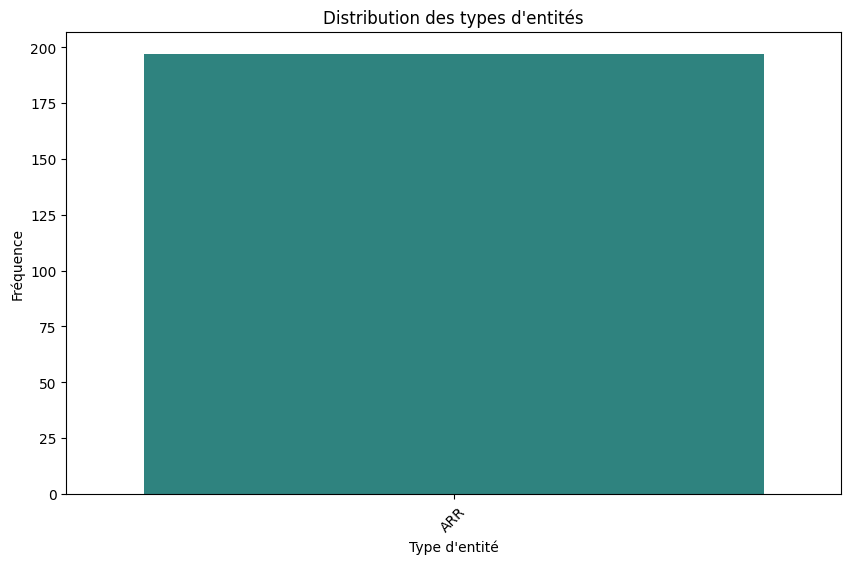

In [27]:
# Visualisation des types d'entités
if entity_types:
    plt.figure(figsize=(10, 6))
    entity_counter = Counter(entity_types)
    sns.barplot(x=list(entity_counter.keys()), y=list(entity_counter.values()), palette="viridis")
    plt.title("Distribution des types d'entités")
    plt.xlabel("Type d'entité")
    plt.ylabel("Fréquence")
    plt.xticks(rotation=45)
    plt.show()

<ipython-input-28-af4ed65f523f>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[e[0] for e in top_entities], y=[e[1] for e in top_entities], palette="Blues_d")


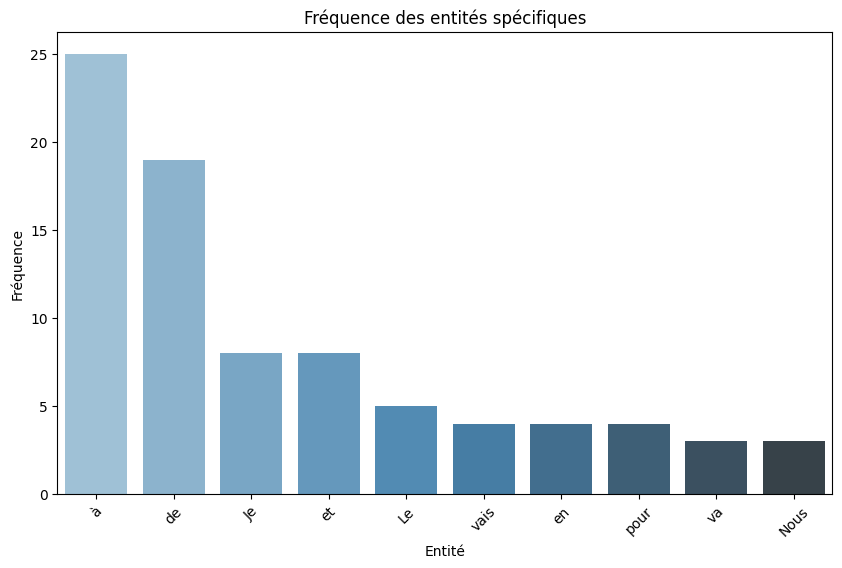

In [28]:
# Visualisation des entités spécifiques
if entities:
    plt.figure(figsize=(10, 6))
    entity_freq = Counter(entities)
    top_entities = entity_freq.most_common(10)  # Top 10 entités les plus fréquentes
    sns.barplot(x=[e[0] for e in top_entities], y=[e[1] for e in top_entities], palette="Blues_d")
    plt.title("Fréquence des entités spécifiques")
    plt.xlabel("Entité")
    plt.ylabel("Fréquence")
    plt.xticks(rotation=45)
    plt.show()

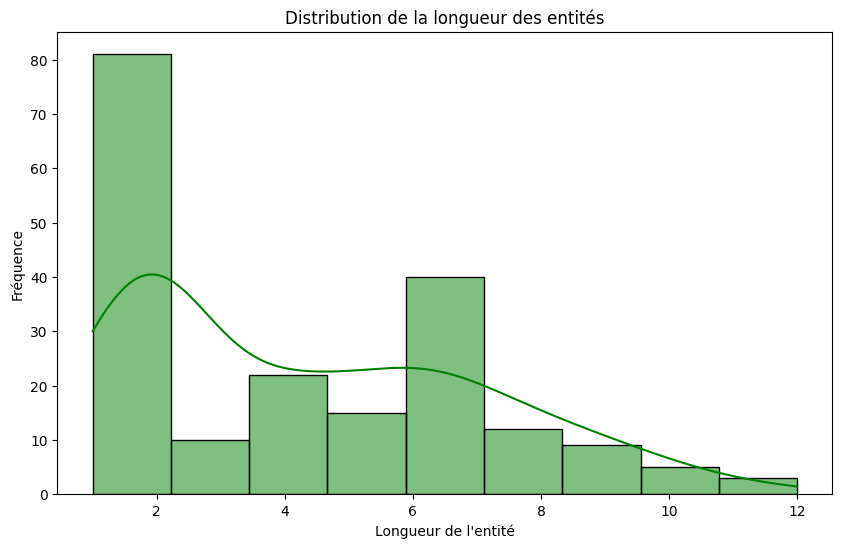

In [29]:
# Visualisation de la longueur des entités
if entities:
    entity_lengths = [len(ent) for ent in entities]
    plt.figure(figsize=(10, 6))
    sns.histplot(entity_lengths, kde=True, color='green')
    plt.title("Distribution de la longueur des entités")
    plt.xlabel("Longueur de l'entité")
    plt.ylabel("Fréquence")
    plt.show()
